In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 151s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_test.shape

(10000, 32, 32, 3)

Here we can see 50k training images and 1000 test images

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough.so we will convert this to now 1D array

In [8]:
y_train = y_train.reshape(-1,)

In [9]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

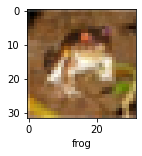

In [12]:
plot_sample(X_train, y_train, 0)

In [15]:
y_train[0]

6

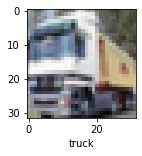

In [13]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range,we need to divide it by 255

#### Normalizing the training data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Build simple ANN for image classification

In [18]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax') #yaha par relu tha acc:9.9% aaya
    ])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 71s 45ms/step - loss: 1.9287 - accuracy: 0.3052
Epoch 2/5
1563/1563 [==============================] - 77s 49ms/step - loss: 1.6447 - accuracy: 0.4226
Epoch 3/5
1563/1563 [==============================] - 75s 48ms/step - loss: 1.5495 - accuracy: 0.4530
Epoch 4/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4794 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4378 - accuracy: 0.4941


ann.evaluate(X_test, y_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.46      0.51      1000
           1       0.60      0.59      0.59      1000
           2       0.45      0.23      0.31      1000
           3       0.32      0.44      0.37      1000
           4       0.42      0.42      0.42      1000
           5       0.42      0.31      0.36      1000
           6       0.47      0.66      0.55      1000
           7       0.65      0.41      0.50      1000
           8       0.42      0.81      0.55      1000
           9       0.61      0.39      0.47      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



#### Now let us build a convolutional neural network to train our images

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6914 - accuracy: 0.3869
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1302 - accuracy: 0.6056
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9881 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8884 - accuracy: 0.6895
Epoch 5/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8181 - accuracy: 0.7167
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7663 - accuracy: 0.7327
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7093 - accuracy: 0.7551
Epoch 8/10
1563/1563 [==============================] - 55s 36ms/step - loss: 0.6624 - accuracy: 0.7724
Epoch 9/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6264 - accuracy: 0.7795
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.9162 - accuracy: 0.7011


[0.9161900281906128, 0.7010999917984009]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[9.6431439e-04, 1.6574913e-05, 2.6222249e-04, 8.9733982e-01,
        8.2571042e-04, 8.6481757e-02, 6.2764371e-03, 2.7699778e-06,
        7.7586779e-03, 7.1702540e-05],
       [3.3801974e-04, 1.5110203e-02, 1.3289137e-05, 6.3909965e-08,
        3.1697525e-08, 6.9357531e-10, 1.6006393e-08, 7.3700079e-08,
        9.8451298e-01, 2.5362751e-05],
       [1.3498059e-01, 2.0607051e-01, 1.7571819e-03, 6.7857979e-03,
        1.5517231e-03, 1.8887360e-03, 2.5771104e-04, 2.2242272e-03,
        6.3682687e-01, 7.6566939e-03],
       [9.2864150e-01, 1.7608281e-03, 2.3325024e-02, 1.0055895e-03,
        5.5193244e-03, 6.0910184e-04, 2.9847486e-04, 4.6252331e-04,
        3.6934990e-02, 1.4426243e-03],
       [5.8039234e-07, 5.4515617e-06, 7.6811444e-03, 1.5376368e-02,
        3.0703511e-02, 9.3954505e-04, 9.4522595e-01, 1.5412149e-07,
        6.6881672e-05, 3.8915562e-07]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred] #to find the maximum element
y_classes[:5]

[3, 8, 8, 0, 6]

In [26]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,) #yeh run krne se ab error nhi aayega

TypeError: only integer scalar arrays can be converted to a scalar index

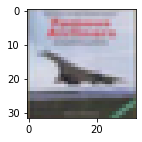

In [27]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

In [29]:
classes[y_classes[3]]

'airplane'